In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import numpy as np

In [70]:
plt.style.use("fivethirtyeight")

In [3]:
happiness=pd.read_csv('../data/world-happiness-report.csv')

In [4]:
happiness

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [5]:
happiness.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

### Happiness is the outcome variable. It is measured by "Life Ladder"
### The other variables (GDP per capita, Social suppport, Life expectancy, Freedom, etc.) are factors that have an impact on happiness.

## Challenge 1: Find the top 10 happiest countries in the world

### Alternative 1: sort the dataframe by "Life Ladder" in reverse order and extract the first 10 rows.
### Alternative 2: groupby "Country name" and compute the mean of "Life Ladder", then sort in reverse order and extract the first 10 rows

In [15]:
#Alternative 1
top101 = happiness.sort_values("Life Ladder", ascending= False).head(10)
top101

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
449,Denmark,2005,8.019,10.851,0.972,69.60,0.971,NaN,0.237,0.860,0.154
451,Denmark,2008,7.971,10.880,0.954,70.08,0.970,0.272,0.248,0.757,0.163
563,Finland,2020,7.889,10.750,0.962,72.10,0.962,-0.116,0.164,0.744,0.193
561,Finland,2018,7.858,10.783,0.962,71.90,0.938,-0.127,0.199,0.782,0.182
450,Denmark,2007,7.834,10.891,0.954,69.92,0.932,0.240,0.206,0.828,0.194
560,Finland,2017,7.788,10.768,0.964,71.80,0.962,-0.002,0.192,0.787,0.176
454,Denmark,2011,7.788,10.848,0.962,70.62,0.935,0.298,0.220,0.769,0.175
562,Finland,2019,7.780,10.792,0.937,72.00,0.948,-0.052,0.195,0.755,0.181
1654,Switzerland,2012,7.776,11.079,0.947,72.78,0.945,0.139,0.323,0.859,0.176
453,Denmark,2010,7.771,10.839,0.975,70.40,0.944,0.242,0.175,0.785,0.155


In [16]:
#Alternative 2
x = happiness.groupby("Country name")["Life Ladder",""].mean()
top102 = x.sort_values(ascending=False)[0:10]
top102

Country name
Denmark        7.680400
Finland        7.597154
Switzerland    7.548300
Norway         7.512400
Netherlands    7.466286
Iceland        7.446500
Canada         7.376333
Sweden         7.369467
New Zealand    7.310286
Australia      7.282071
Name: Life Ladder, dtype: float64

## Challenge 2: Compare the 5 happiest countries in the world with the 5 least happy ones


### Tip: find the top 5 and the bottom 5 countries, then filter the original dataframe to extract observations specific to those countries, finally visualize the results
### Tip: you can create a composite filter contatenating each country with an OR operator

In [18]:
#Filtering, to get the bottom 5
y = happiness.groupby("Country name")["Life Ladder"].mean()
Bot102 = y.sort_values(ascending=True)[0:10]
Bot102


Country name
South Sudan                 3.402000
Central African Republic    3.515000
Burundi                     3.548200
Togo                        3.555000
Afghanistan                 3.594667
Rwanda                      3.654417
Tanzania                    3.697333
Zimbabwe                    3.882600
Yemen                       3.912250
Comoros                     3.944000
Name: Life Ladder, dtype: float64

In [178]:
#dataframe with filters
dftop5 = happiness[(happiness["Country name"]=="Denmark") | (happiness["Country name"]=="Finland") | (happiness["Country name"]=="Switzerland") | (happiness["Country name"]=="Norway") | (happiness["Country name"]=="Netherlands") ]
dfbot5 = happiness[(happiness["Country name"]=="South Sudan") | (happiness["Country name"]=="Central African Republic") | (happiness["Country name"]=="Burundi") | (happiness["Country name"]=="Togo") | (happiness["Country name"]=="Afghanistan") ]

In [179]:
dftop5grouped = dftop5.groupby('Country name')["Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"].mean()
dfbot5grouped = dfbot5.groupby('Country name')["Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"].mean()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [180]:
dfbot5grouped

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.3265
Burundi,3.548200,6.722400,0.417800,50.916000,0.450800,-0.036600,0.732400,0.618400,0.2442
Central African Republic,3.515000,6.961000,0.402400,43.356000,0.680400,0.027000,0.842000,0.561600,0.3914
South Sudan,3.402000,NaN,0.554750,50.410000,0.493750,NaN,0.749500,0.600250,0.4860
Togo,3.555000,7.239222,0.456000,52.837778,0.623333,-0.030778,0.803222,0.561667,0.4200


Text(0.5, 0, 'Country Name')

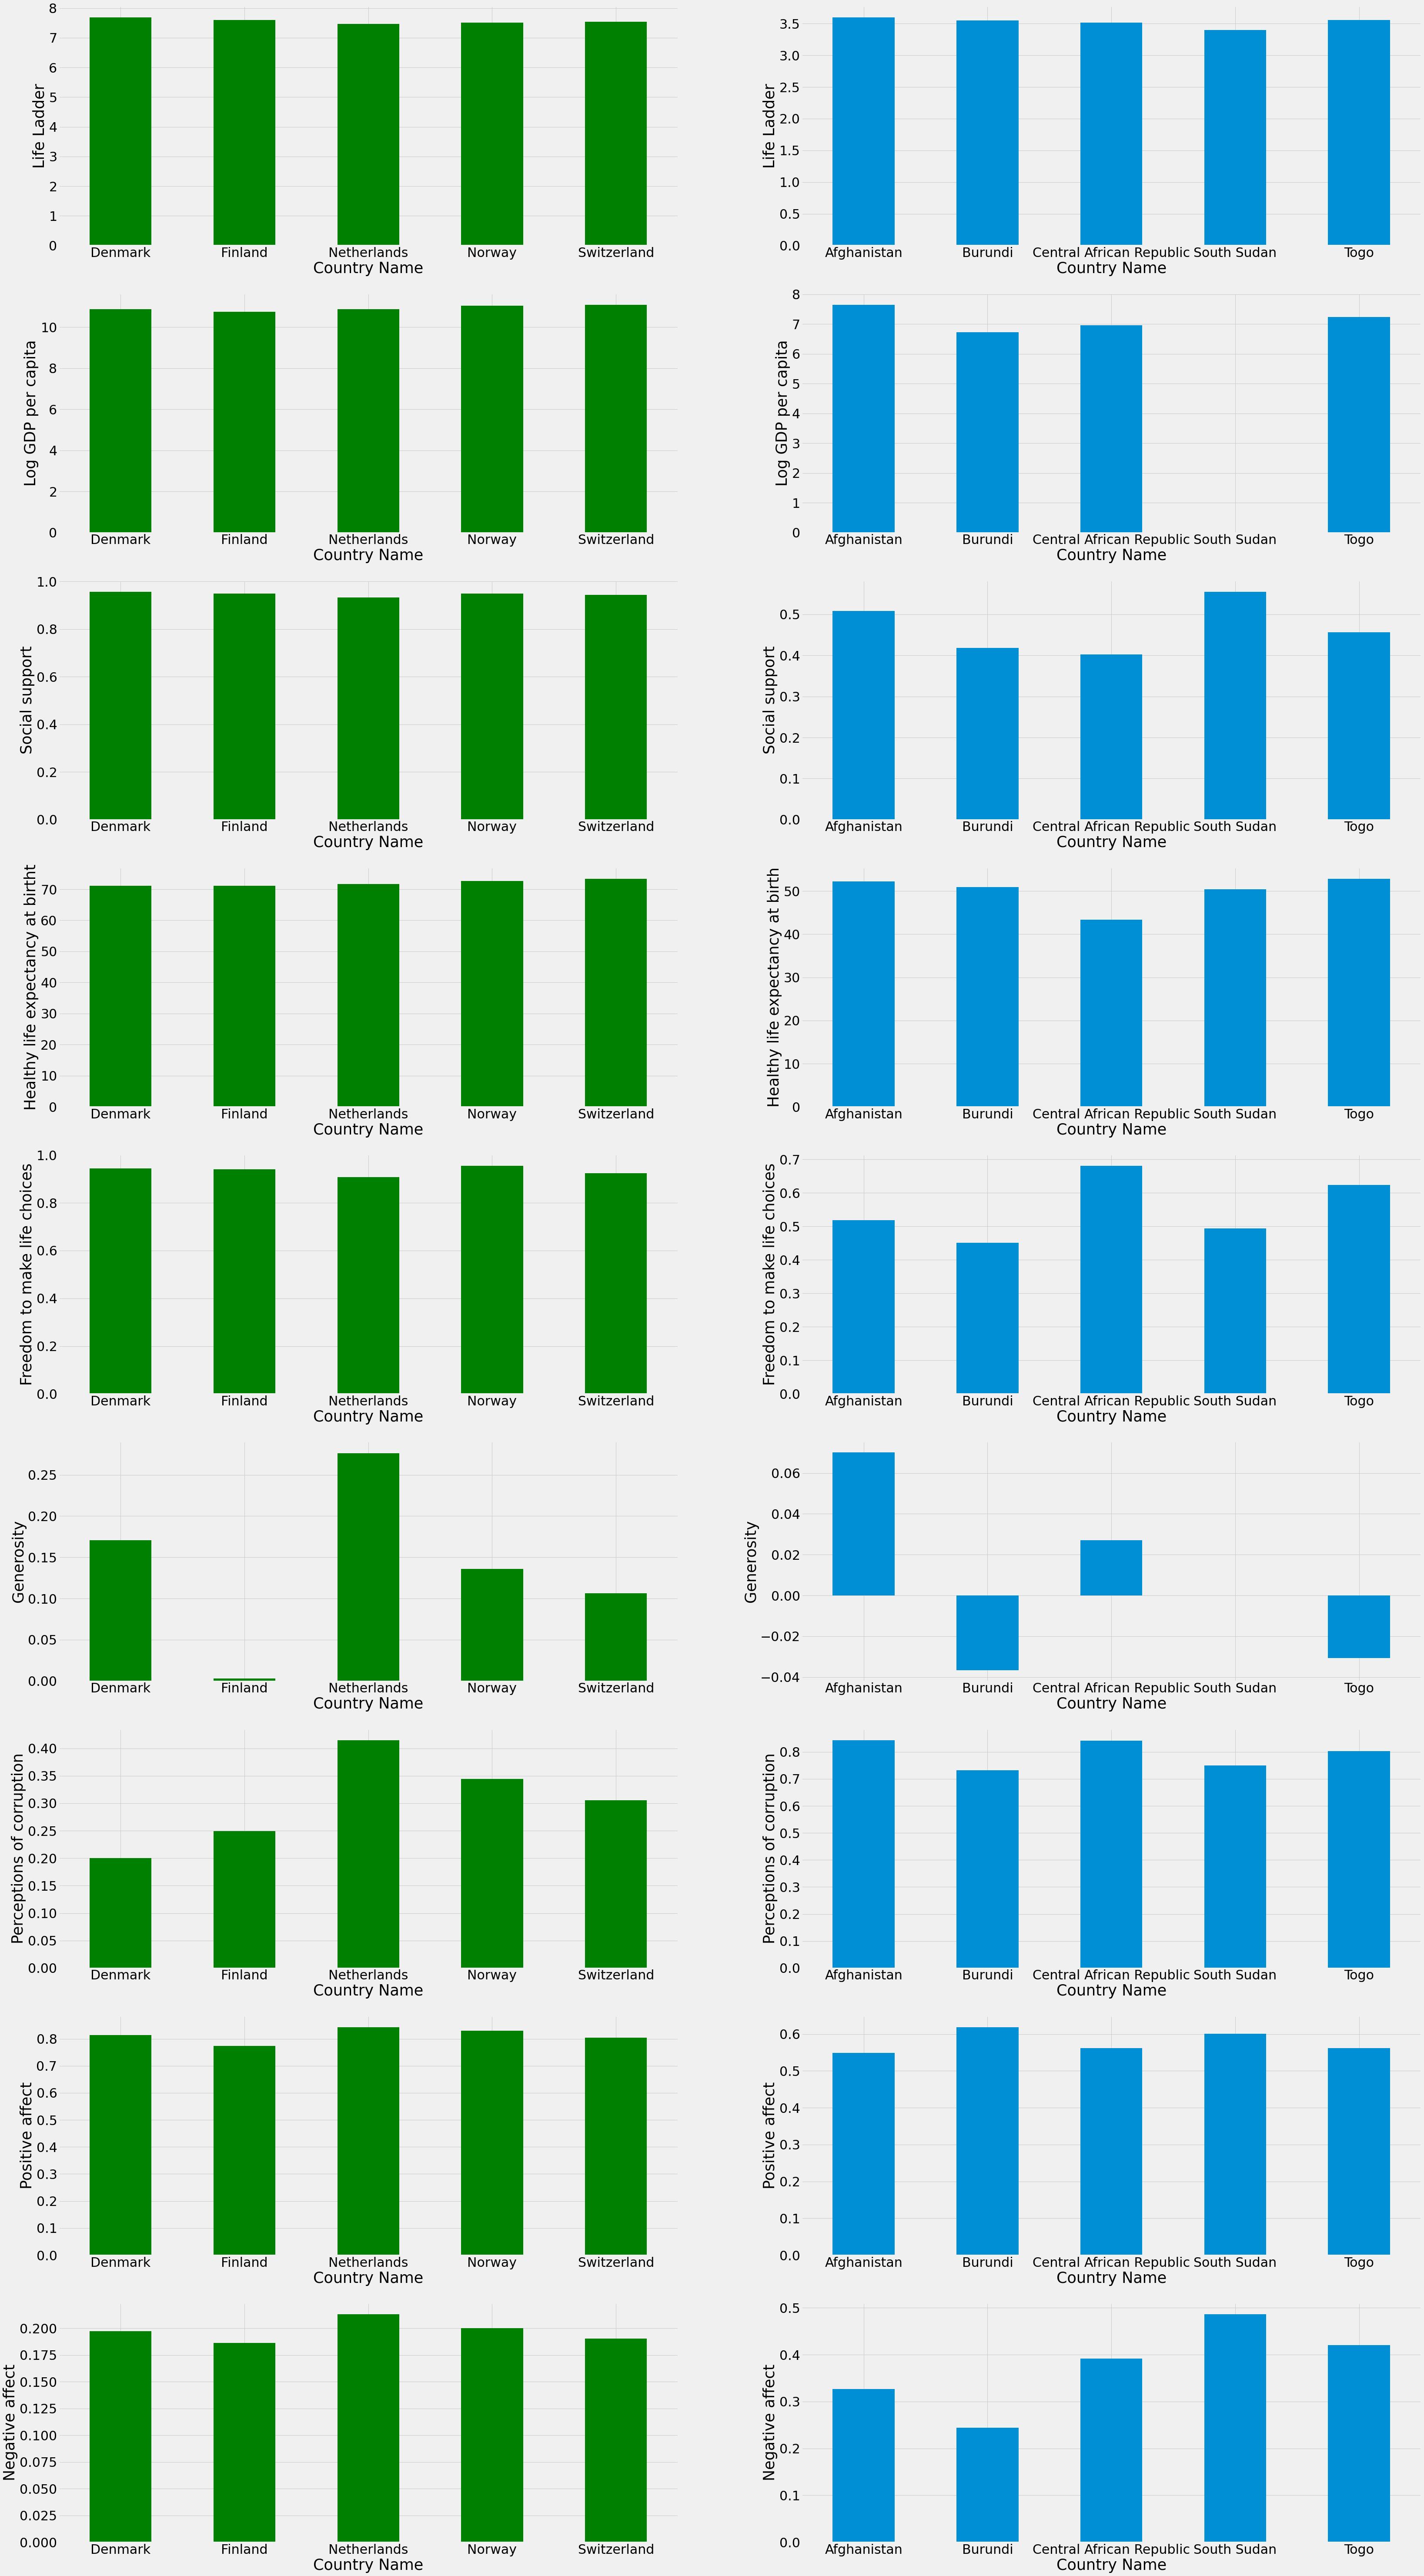

In [182]:
plt.figure(figsize= (50,100))
plt.subplot(9,2,1)
ax1 = dftop5grouped.iloc[:,0].plot.bar(rot=0,color="green",fontsize=30)
ax1.set_ylabel(ylabel="Life Ladder",fontdict={'fontsize':35})
ax1.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,2)
ax2 = dfbot5grouped.iloc[:,0].plot.bar(rot=0,fontsize=30)
ax2.set_ylabel(ylabel="Life Ladder",fontdict={'fontsize':35})
ax2.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,3)
ax3 = dftop5grouped.iloc[:,1].plot.bar(rot=0,color="green",fontsize=30)
ax3.set_ylabel(ylabel="Log GDP per capita",fontdict={'fontsize':35})
ax3.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,4)
ax4 = dfbot5grouped.iloc[:,1].plot.bar(rot=0,fontsize=30)
ax4.set_ylabel(ylabel="Log GDP per capita",fontdict={'fontsize':35})
ax4.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,5)
ax5 = dftop5grouped.iloc[:,2].plot.bar(rot=0,color="green",fontsize=30)
ax5.set_ylabel(ylabel="Social support",fontdict={'fontsize':35})
ax5.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,6)
ax6 = dfbot5grouped.iloc[:,2].plot.bar(rot=0,fontsize=30)
ax6.set_ylabel(ylabel="Social support",fontdict={'fontsize':35})
ax6.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,7)
ax7 = dftop5grouped.iloc[:,3].plot.bar(rot=0,color="green",fontsize=30)
ax7.set_ylabel(ylabel="Healthy life expectancy at birtht",fontdict={'fontsize':35})
ax7.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,8)
ax8 = dfbot5grouped.iloc[:,3].plot.bar(rot=0,fontsize=30)
ax8.set_ylabel(ylabel="Healthy life expectancy at birth",fontdict={'fontsize':35})
ax8.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,9)
ax9 = dftop5grouped.iloc[:,4].plot.bar(rot=0,color="green",fontsize=30)
ax9.set_ylabel(ylabel="Freedom to make life choices",fontdict={'fontsize':35})
ax9.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,10)
ax10 = dfbot5grouped.iloc[:,4].plot.bar(rot=0,fontsize=30)
ax10.set_ylabel(ylabel="Freedom to make life choices",fontdict={'fontsize':35})
ax10.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,11)
ax11 = dftop5grouped.iloc[:,5].plot.bar(rot=0,color="green",fontsize=30)
ax11.set_ylabel(ylabel="Generosity",fontdict={'fontsize':35})
ax11.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,12)
ax12 = dfbot5grouped.iloc[:,5].plot.bar(rot=0,fontsize=30)
ax12.set_ylabel(ylabel="Generosity",fontdict={'fontsize':35})
ax12.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})

plt.subplot(9,2,13)
ax13 = dftop5grouped.iloc[:,6].plot.bar(rot=0,color="green",fontsize=30)
ax13.set_ylabel(ylabel="Perceptions of corruption",fontdict={'fontsize':35})
ax13.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,14)
ax14 = dfbot5grouped.iloc[:,6].plot.bar(rot=0,fontsize=30)
ax14.set_ylabel(ylabel="Perceptions of corruption",fontdict={'fontsize':35})
ax14.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})

plt.subplot(9,2,15)
ax15 = dftop5grouped.iloc[:,7].plot.bar(rot=0,color="green",fontsize=30)
ax15.set_ylabel(ylabel="Positive affect",fontdict={'fontsize':35})
ax15.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,16)
ax16 = dfbot5grouped.iloc[:,7].plot.bar(rot=0,fontsize=30)
ax16.set_ylabel(ylabel="Positive affect",fontdict={'fontsize':35})
ax16.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})

plt.subplot(9,2,17)
ax17 = dftop5grouped.iloc[:,8].plot.bar(rot=0,color="green",fontsize=30)
ax17.set_ylabel(ylabel="Negative affect",fontdict={'fontsize':35})
ax17.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})
plt.subplot(9,2,18)
ax18 = dfbot5grouped.iloc[:,8].plot.bar(rot=0,fontsize=30)
ax18.set_ylabel(ylabel="Negative affect",fontdict={'fontsize':35})
ax18.set_xlabel(xlabel="Country Name",fontdict={'fontsize':35})






    
    

### Challenge 3: Which factors have an impact on happiness ?


#### Tip: consider computing the correlation between variables
#### Tip: consider https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

''

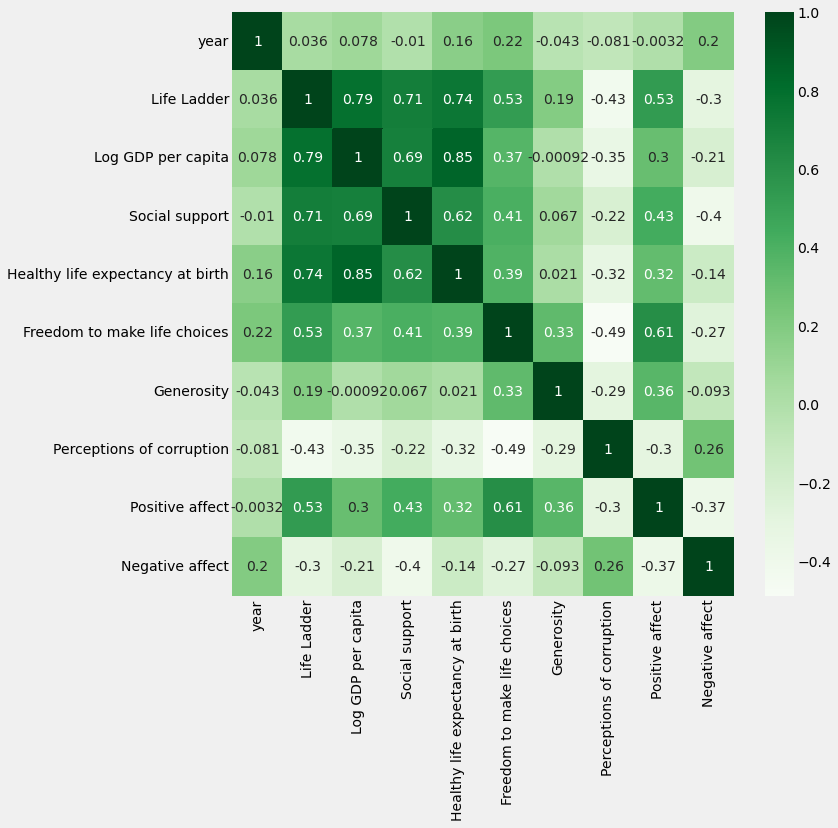

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(happiness.corr(),annot= True,cmap = "Greens")
;

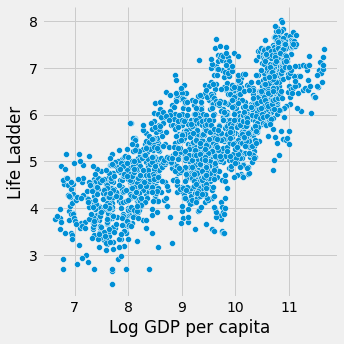

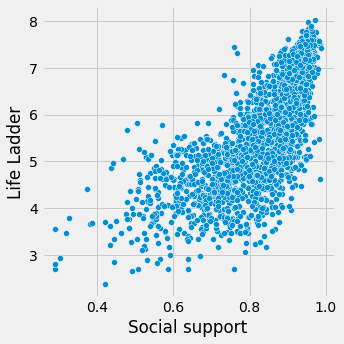

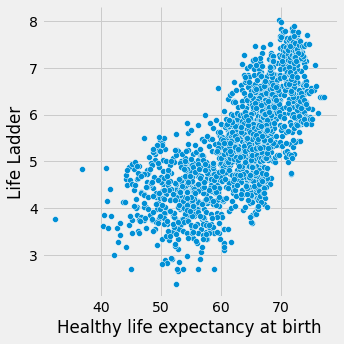

In [175]:
#the heatmap shows that Life Ladder is correlated with Log GDP per capita, social support and Healthy life expextancy at birth
sns.relplot(x="Log GDP per capita", y="Life Ladder", data=happiness)
sns.relplot(x="Social support", y="Life Ladder", data=happiness)
sns.relplot(x="Healthy life expectancy at birth", y="Life Ladder", data=happiness)

